# JSON

- JavaScript Object Notation, '제이슨'이라고 읽는다
- 간단한 데이터 저장 방식
- 파이썬의 딕셔너리와 리스트를 문자열로 표현한 것과 비슷

In [5]:
import json

In [6]:
data = {'a': [1, 2, 3], 'b': 'hello'}

데이터를 문자열로 변환

In [3]:
json.dumps(data)

'{"a": [1, 2, 3], "b": "hello"}'

In [4]:
# data 문자열 
text = json.dumps(data)
text[:10]

'{"a": [1, '

문자열을 데이터로 변환

In [5]:
json.loads('{"a": [1, 2, 3], "b": "hello"}')

{'a': [1, 2, 3], 'b': 'hello'}

## Schema.org

- 구조화된 데이터(structured data)를 위한 표준 개발 커뮤니티
- 인물, 상품, 신문기사 등에 기계가 읽을 수 있는 구조를 부여
- JSON, microdata 등의 형식이 있음
- [구글 구조화된 데이터 테스트 도구](https://search.google.com/structured-data/testing-tool/)
- 예시:
    - https://schema.org/Person
        - [Person 예시](https://www.instagram.com/dlwlrma/)
        - [테스트 도구로 보기](https://search.google.com/structured-data/testing-tool/u/0/#url=https%3A%2F%2Fwww.instagram.com%2Fdlwlrma%2F)
    - https://schema.org/Product
        - [Product 예시](https://www.newegg.com/p/N82E16824009496?Item=9SIA6ZP3KR9823)
        - [테스트 도구로 보기](https://search.google.com/structured-data/testing-tool/u/0/#url=https%3A%2F%2Fwww.newegg.com%2Fp%2FN82E16824009496%3FItem%3D9SIA6ZP3KR9823)
    - https://schema.org/Article
        - [Article 예시](https://www.nytimes.com/2019/06/03/technology/itunes-shutting-down.html)
        - [테스트 도구로 보기](https://search.google.com/structured-data/testing-tool/u/0/#url=https%3A%2F%2Fwww.nytimes.com%2F2019%2F06%2F03%2Ftechnology%2Fitunes-shutting-down.html)

# 웹 스크래핑에서 JSON

- JSON은 원래 JavaScript라는 언어의 데이터 저장 방식
- JavaScript: 웹 페이지 안에 들어가는 작은(?) 프로그램을 작성하기 위한 언어
- 현재의 여러 웹사이트는 JSON으로 전송된 데이터를 JavaScript를 이용해 동적으로 페이지를 생성
- HTML 대신 JSON을 찾아내서 처리해야할 경우가 있음

## 인스타그램

In [7]:
import requests

In [7]:
res = requests.get('https://www.instagram.com/dlwlrma/')

In [8]:
for text in res.text.splitlines():
    if 'window._sharedData = ' in text:
        break

In [9]:
text[:100]

'            <script type="text/javascript">window._sharedData = {"config":{"csrf_token":"2ZoYtN8u91o'

In [10]:
text[-100:]

'alse,"cb":false},"rollout_hash":"e0f5f1d27e2c","bundle_variant":"metro","is_canary":false};</script>'

In [11]:
text

'            <script type="text/javascript">window._sharedData = {"config":{"csrf_token":"2ZoYtN8u91opPQ0ZSs0qf6rrJZtuXXtZ","viewer":null,"viewerId":null},"country_code":"KR","language_code":"en","locale":"en_US","entry_data":{"ProfilePage":[{"logging_page_id":"profilePage_1692800026","show_suggested_profiles":true,"graphql":{"user":{"biography":"","blocked_by_viewer":false,"country_block":false,"external_url":"https://youtu.be/nM0xDI5R50E","external_url_linkshimmed":"https://l.instagram.com/?u=https%3A%2F%2Fyoutu.be%2FnM0xDI5R50E\\u0026e=ATNth5FiDmaZXsFtPV6W-Mpd66LcB3g1ebp6WdDIiymRJw6Ui0etfaIn1tIkcouwNIF00He2","edge_followed_by":{"count":8017221},"followed_by_viewer":false,"edge_follow":{"count":97},"follows_viewer":false,"full_name":"\\uc774\\uc9c0\\uae08","has_channel":false,"has_blocked_viewer":false,"highlight_reel_count":0,"has_requested_viewer":false,"id":"1692800026","is_business_account":false,"is_joined_recently":false,"business_category_name":null,"is_private":false,"is_veri

### 불필요한 부분 삭제

In [8]:
import re

In [13]:
# 맨 앞에서 '{' 가 아닌 글자가 한개 이상 나오면 지우기 
# ^ 가 [  밖에 있으면 맨앞, 안에 있으면 제외의 의미 
text = re.sub(r'^[^{]+', '', text)

In [14]:
# 맨 끝에서 중괄호가 아닌부분 
text = re.sub(r'[^}]+$', '', text)

In [15]:
text[:100]

'{"config":{"csrf_token":"2ZoYtN8u91opPQ0ZSs0qf6rrJZtuXXtZ","viewer":null,"viewerId":null},"country_c'

In [16]:
text[-100:]

'has_app":false,"cb":false},"rollout_hash":"e0f5f1d27e2c","bundle_variant":"metro","is_canary":false}'

### JSON 읽기

In [17]:
data = json.loads(text)

In [18]:
edges = data['entry_data']['ProfilePage'][0]['graphql']['user']['edge_owner_to_timeline_media']['edges']

In [19]:
edges[0]

{'node': {'__typename': 'GraphVideo',
  'comments_disabled': False,
  'dimensions': {'height': 421, 'width': 750},
  'display_url': 'https://scontent-icn1-1.cdninstagram.com/vp/3e1a15d9359516a32ee4328cc7448004/5D00B054/t51.2885-15/e15/61127259_315249046059796_2724271920727329218_n.jpg?_nc_ht=scontent-icn1-1.cdninstagram.com',
  'edge_liked_by': {'count': 377429},
  'edge_media_preview_like': {'count': 377429},
  'edge_media_to_caption': {'edges': [{'node': {'text': '캬 잘한다\nhttp://www.youtube.com/watch?v=2LVYavV5xX4 아이유티비🎄'}}]},
  'edge_media_to_comment': {'count': 2969},
  'gating_info': None,
  'id': '2062397679614414422',
  'is_video': True,
  'location': None,
  'media_preview': None,
  'owner': {'id': '1692800026', 'username': 'dlwlrma'},
  'shortcode': 'ByfG8M3Ac5W',
  'taken_at_timestamp': 1560077119,
  'thumbnail_resources': [{'config_height': 150,
    'config_width': 150,
    'src': 'https://scontent-icn1-1.cdninstagram.com/vp/947e226da76f36332ef761c55fddbea8/5D00502F/t51.2885-

### 포스트 접속

In [20]:
res = requests.get('https://www.instagram.com/p/' + edges[0]['node']['shortcode'])

### JSON 추출 및 불필요한 부분 삭제

In [21]:
for text in res.text.splitlines():
    if 'window._sharedData = ' in text:
        break

In [22]:
text = re.sub(r'^[^{]+', '', text)
text = re.sub(r'[^}]+$', '', text)

In [23]:
data = json.loads(text)

### 댓글 추출

In [24]:
comments = data['entry_data']['PostPage'][0]['graphql']['shortcode_media']['edge_media_to_parent_comment']['edges']

In [25]:
for i in range(10):
    print(comments[i]['node']['text'])

waaaaaaaaaaaahhh IU saranghaeeeee❤❤❤ from Philippines 😘
@ha.n_n.aa_a 죽음..
I hope you’re fine, gurl 💕
@orion35_  누나 나 죽어 😍
@playboirakim 기요미다잉
好正😍
kia☺️
잘부른다.. 굿
❤❤❤
캬 좋다 ㅎㅅㅎㅋ


# 워드 클라우드

### 설치

In [ ]:
!conda install -c conda-forge wordcloud

### 데이터 가져오기

In [9]:
import lxml.html

In [10]:
import pandas as pd

In [11]:
res = requests.get('https://www.nytimes.com/2019/06/03/technology/itunes-shutting-down.html')

In [12]:
root = lxml.html.fromstring(res.text)

In [13]:
content = root.cssselect('[itemProp="articleBody"]')[0].text_content()

### TDM

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv = CountVectorizer(stop_words='english')

In [16]:
tdm = cv.fit_transform([content]).toarray()

In [17]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})

C:\Users\inyoung\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [18]:
df.sort_values('freq', ascending=False).head()

,word,freq
267,music,22
220,itunes,20
26,apple,16
287,people,11
235,like,6


### 단어 구름 그리기

In [19]:
from wordcloud import WordCloud

In [20]:
wc = WordCloud(width=400, height=400, background_color='white')

In [21]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}

In [22]:
wc.fit_words(frequencies)

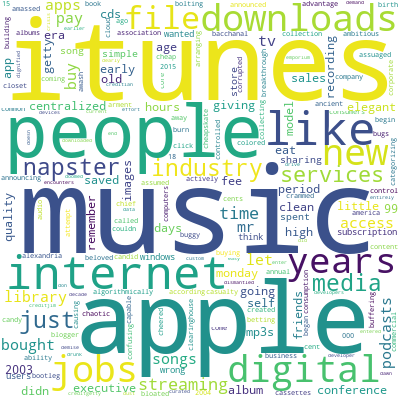

In [23]:
wc.to_image()